<a href="https://colab.research.google.com/github/andhika11264/Bengkel-Koding/blob/main/CAPSTONE_PROJECT_BENGKEL_KODING_DATA_SCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pengumpulan Data**

In [2]:
import pandas as pd

data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **Menelaah Data**

In [3]:
# Tampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", data.shape)

Jumlah baris dan kolom: (3276, 10)


In [4]:
# Tampilkan informasi tipe data setiap kolom
print("\nInformasi tipe data tiap kolom:")
print(data.info())


Informasi tipe data tiap kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [ ]:
# Tampilkan jumlah nilai unik setiap kolom
print("\nJumlah nilai unik setiap kolom:")
print(data.nunique())


Jumlah nilai unik setiap kolom:
ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


In [ ]:
# Tampilkan beberapa data contoh
print("\nContoh data:")
data.head()


Contoh data:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **Validasi dan Visualisasi Data**

In [ ]:
# Cek jumlah missing values
print("\nJumlah missing values tiap kolom:")
print(data.isnull().sum())

# Imputasi missing values dengan rata-rata
data.fillna(data.mean(), inplace=True)

# Validasi ulang missing values
print("\nJumlah missing values setelah imputasi:")
print(data.isnull().sum())



Jumlah missing values tiap kolom:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Jumlah missing values setelah imputasi:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
import numpy as np

# Deteksi outlier menggunakan IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identifikasi outlier
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Tampilkan jumlah outlier per kolom
print("\nJumlah outlier tiap kolom:")
print(outliers.sum())

# Imputasi outlier dengan rata-rata kolom
for col in data.select_dtypes(include=np.number).columns:
    mean_val = data[col].mean()
    data[col] = np.where(outliers[col], mean_val, data[col])



Jumlah outlier tiap kolom:
ph                 142
Hardness            83
Solids              47
Chloramines         61
Sulfate            264
Conductivity        11
Organic_carbon      25
Trihalomethanes     54
Turbidity           19
Potability           0
dtype: int64


<ipython-input-48-81a811639d94>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


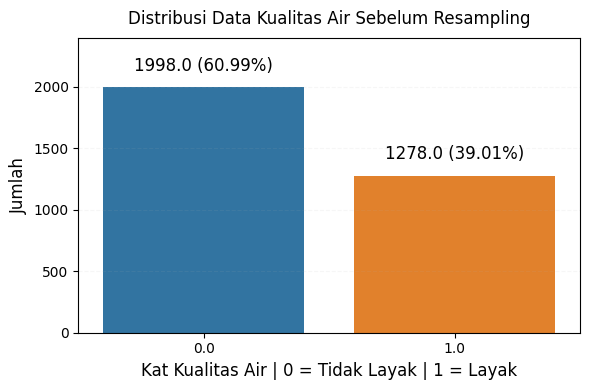

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung distribusi
counts = data['Potability'].value_counts()
percentages = (counts / counts.sum()) * 100

# Buat dataframe untuk kategori
dist_df = counts.reset_index()
dist_df.columns = ['Kategori', 'Jumlah']
dist_df['Persentase'] = percentages.values

# Warna untuk kategori
colors = ['#1f77b4', '#ff7f0e']

# Bar plot dengan seaborn
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Kategori',
    y='Jumlah',
    data=dist_df,
    palette=colors
)

# Tambahkan jumlah dan persentase di atas bar
for i, row in dist_df.iterrows():
    plt.text(
        x=i,
        y=row['Jumlah'] + (0.05 * counts.max()),
        s=f"{row['Jumlah']} ({row['Persentase']:.2f}%)",
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

# Judul dan label
plt.title(
    "Distribusi Data Kualitas Air Sebelum Resampling",
    fontsize=12,
    pad=10  # Tambahkan jarak dari elemen di bawahnya
)
plt.xlabel("Kat Kualitas Air | 0 = Tidak Layak | 1 = Layak", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)

# Atur batas sumbu y agar label tidak keluar
plt.ylim(0, counts.max() + counts.max() * 0.2)

# Tambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.1)

# Tampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Pisahkan fitur dan target
X = data.drop(columns=['Potability'])
y = data['Potability']

# Resampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Gabungkan kembali data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.DataFrame(y_resampled, columns=['Potability'])], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


<ipython-input-51-bb3ec3b761d7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


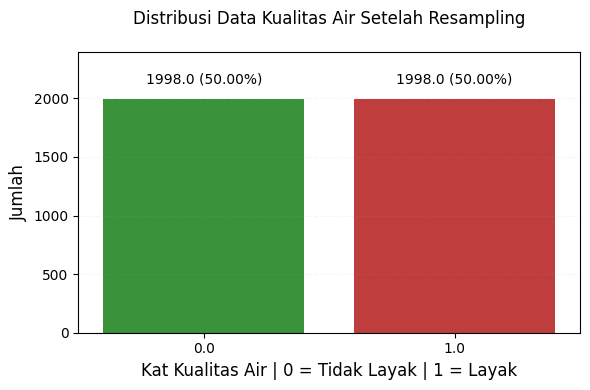

In [ ]:
# Hitung distribusi setelah resampling
counts_resampled = df_resampled['Potability'].value_counts()
percentages_resampled = (counts_resampled / counts_resampled.sum()) * 100

# Buat dataframe untuk kategori setelah resampling
dist_resampled_df = counts_resampled.reset_index()
dist_resampled_df.columns = ['Kategori', 'Jumlah']
dist_resampled_df['Persentase'] = percentages_resampled.values

# Warna untuk kategori setelah resampling
colors_resampled = ['#2ca02c', '#d62728']  # Hijau untuk 0, Merah untuk 1

# Bar plot dengan seaborn setelah resampling
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Kategori',
    y='Jumlah',
    data=dist_resampled_df,
    palette=colors_resampled
)

# Tambahkan jumlah dan persentase di atas bar
for i, row in dist_resampled_df.iterrows():
    plt.text(
        x=i,
        y=row['Jumlah'] + (0.05 * counts_resampled.max()),  # Tambahkan jarak label
        s=f"{row['Jumlah']} ({row['Persentase']:.2f}%)",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Judul dan label
plt.title(
    "Distribusi Data Kualitas Air Setelah Resampling",
    fontsize=12,
    pad=20  # Tambahkan jarak dari elemen di bawahnya
)
plt.xlabel("Kat Kualitas Air | 0 = Tidak Layak | 1 = Layak", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)

# Atur batas sumbu y agar label tidak keluar
plt.ylim(0, counts_resampled.max() + counts_resampled.max() * 0.2)

# Tambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.1)

# Tampilkan plot
plt.tight_layout()
plt.show()


# **Menentukan Objek Data**

In [ ]:
# Menentukan fitur dan target
features = [
    'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
    'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'

In [ ]:
# Memastikan fitur dan target ada dalam dataset
if all(col in data.columns for col in features + [target]):
    print("\nFitur yang digunakan:")
    print(features)
    print("\nTarget yang ingin diprediksi:")
    print(target)
else:
    print("Beberapa fitur atau target tidak ditemukan dalam dataset. Periksa kembali nama kolom.")

# Memisahkan fitur dan target
X = data[features]
y = data[target]



Fitur yang digunakan:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

Target yang ingin diprediksi:
Potability


In [ ]:
# Menampilkan informasi tentang objek data
print("\nInformasi data fitur:")
print(X.info())
print("\nStatistik deskriptif fitur:")
print(X.describe())
print("\nDistribusi target:")
print(y.value_counts())


Informasi data fitur:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
dtypes: float64(9)
memory usage: 230.5 KB
None

Statistik deskriptif fitur:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.072472   196.504096  21629.750926     7.123028   333.669599   
std       1.212457    29.401643   8137.573905     1.445694    25

# **Membersihkan Data**

In [ ]:
# Membersihkan Data
# Mengatasi missing values dengan imputasi (misalnya: mean imputasi)
data.fillna(data.mean(), inplace=True)

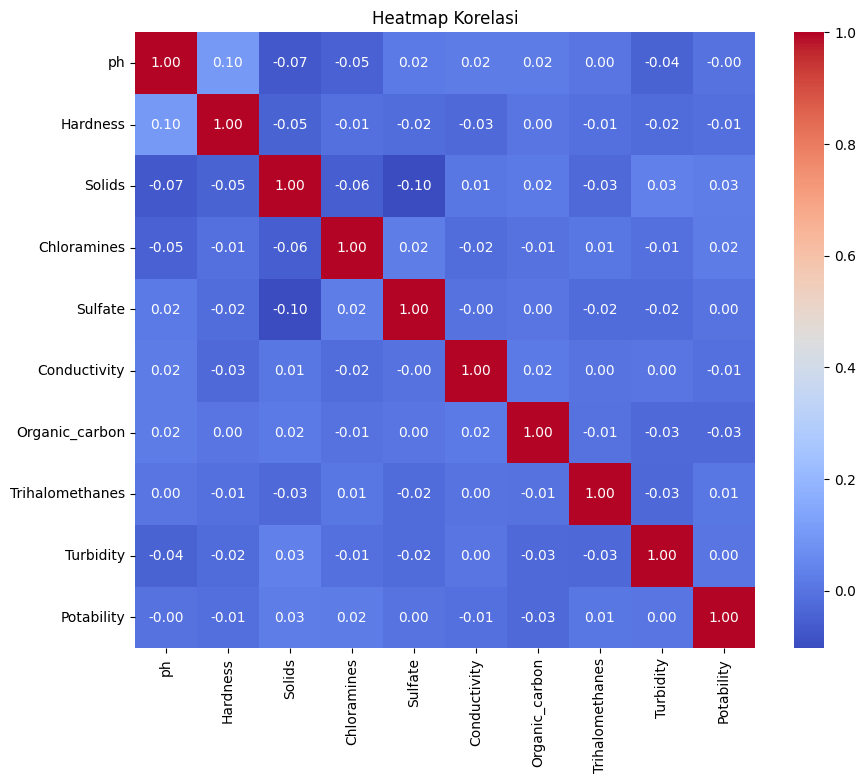

In [ ]:
# Visualisasi Korelasi Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()


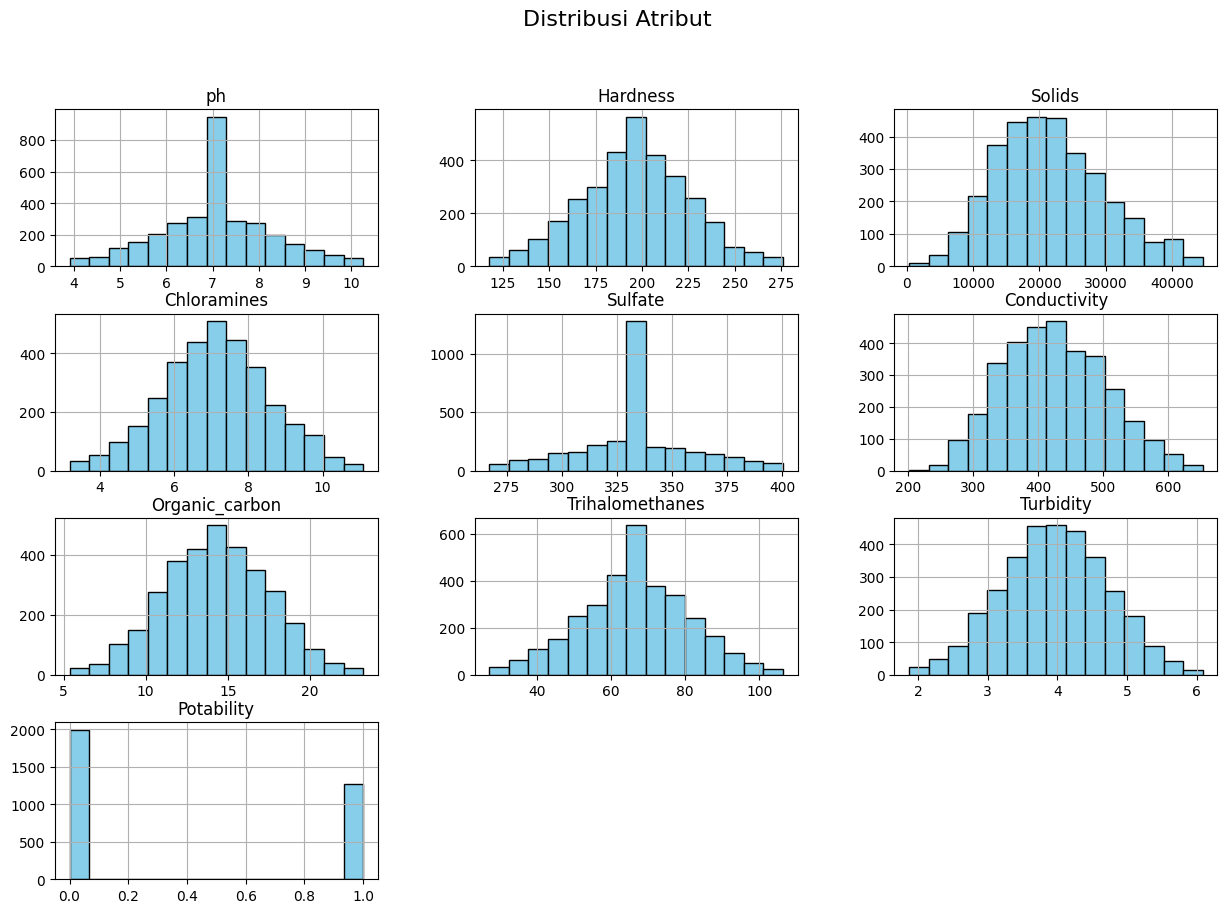

In [ ]:
# Visualisasi Distribusi Atribut menggunakan Histogram
data.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Atribut', fontsize=16)
plt.show()

# ***Pemodelan, Evaluasi***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Pemodelan
# Membagi dataset menjadi fitur dan target
X = data.drop(columns=['Potability'])
y = data['Potability']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)

(2620, 9)
(656, 9)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Logistic Regression - Akurasi Sebelum Normalisasi: 0.6097560975609756
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       400
         1.0       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



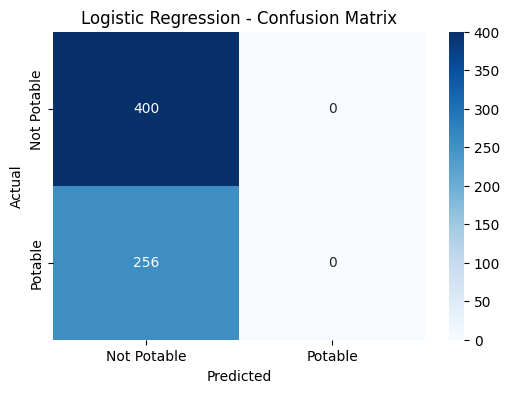


Random Forest - Akurasi Sebelum Normalisasi: 0.6265243902439024
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.88      0.74       400
         1.0       0.55      0.24      0.33       256

    accuracy                           0.63       656
   macro avg       0.60      0.56      0.54       656
weighted avg       0.61      0.63      0.58       656



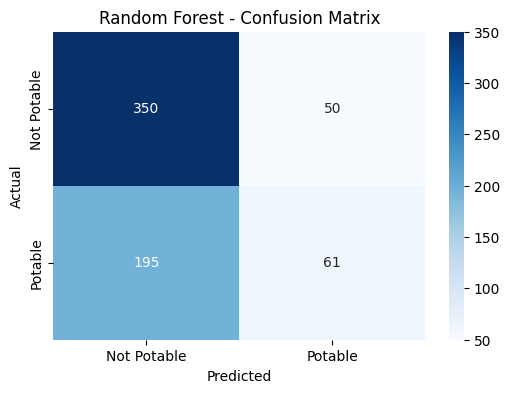


SVM - Akurasi Sebelum Normalisasi: 0.6097560975609756
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       400
         1.0       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


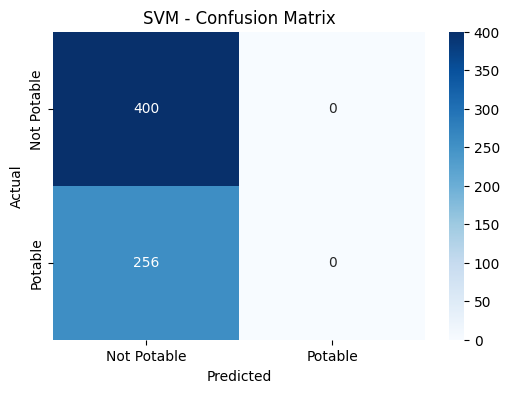


KNN - Akurasi Sebelum Normalisasi: 0.5625
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.72      0.67       400
         1.0       0.42      0.31      0.36       256

    accuracy                           0.56       656
   macro avg       0.52      0.52      0.51       656
weighted avg       0.54      0.56      0.55       656



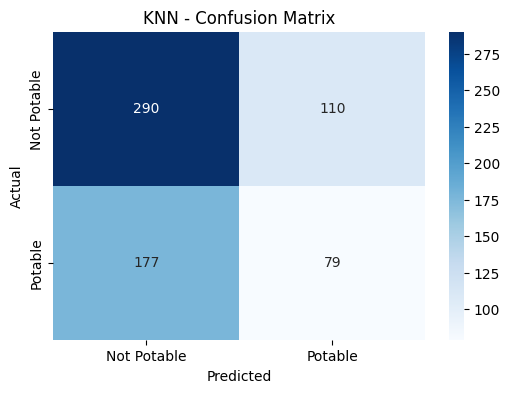


Decision Tree - Akurasi Sebelum Normalisasi: 0.5625
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65       400
         1.0       0.44      0.41      0.42       256

    accuracy                           0.56       656
   macro avg       0.54      0.53      0.53       656
weighted avg       0.56      0.56      0.56       656



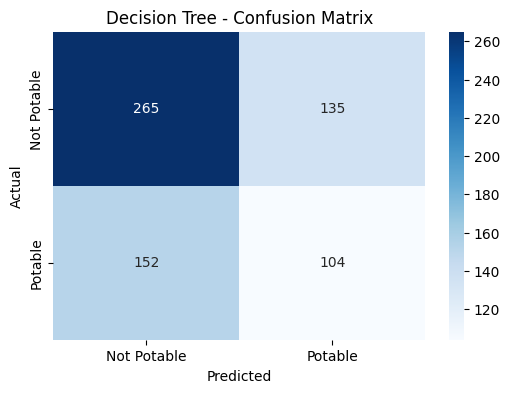

In [ ]:
# Inisialisasi model klasifikasi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Evaluasi sebelum normalisasi
results_before_norm = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results_before_norm[name] = acc

    print(f"\n{name} - Akurasi Sebelum Normalisasi: {acc}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Logistic Regression - Akurasi Setelah Normalisasi: 0.6097560975609756
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       400
         1.0       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


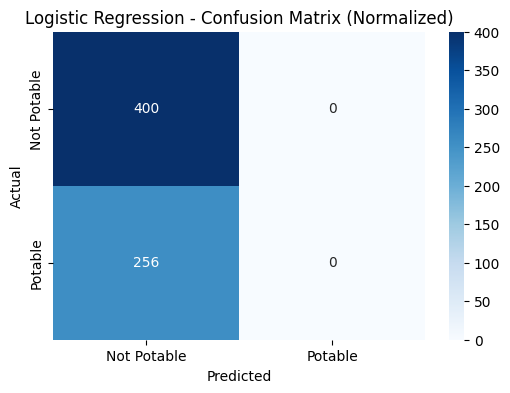


Random Forest - Akurasi Setelah Normalisasi: 0.6265243902439024
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.88      0.74       400
         1.0       0.55      0.24      0.33       256

    accuracy                           0.63       656
   macro avg       0.60      0.56      0.54       656
weighted avg       0.61      0.63      0.58       656



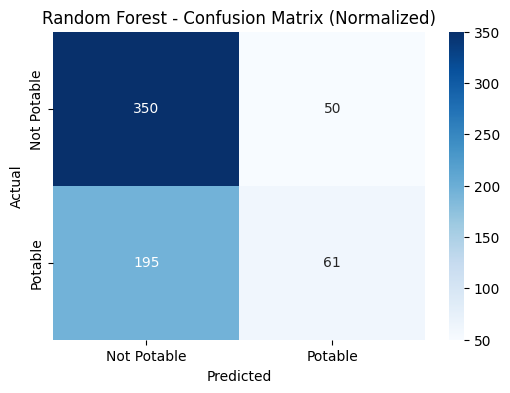


SVM - Akurasi Setelah Normalisasi: 0.6295731707317073
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75       400
         1.0       0.57      0.21      0.31       256

    accuracy                           0.63       656
   macro avg       0.60      0.55      0.53       656
weighted avg       0.61      0.63      0.58       656



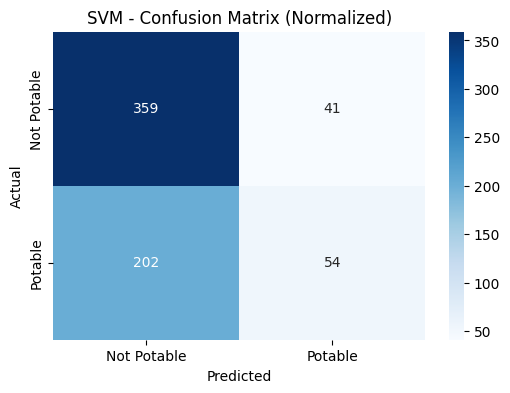


KNN - Akurasi Setelah Normalisasi: 0.586890243902439
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.76      0.69       400
         1.0       0.46      0.31      0.37       256

    accuracy                           0.59       656
   macro avg       0.55      0.54      0.53       656
weighted avg       0.57      0.59      0.57       656



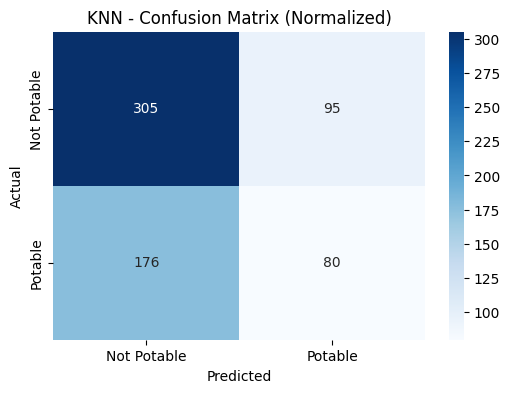


Decision Tree - Akurasi Setelah Normalisasi: 0.5625
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65       400
         1.0       0.44      0.41      0.42       256

    accuracy                           0.56       656
   macro avg       0.54      0.53      0.53       656
weighted avg       0.56      0.56      0.56       656



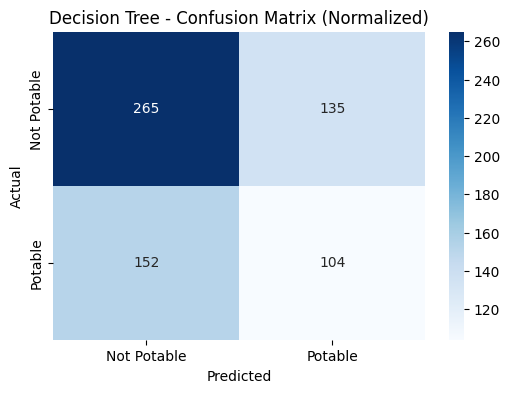

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluasi setelah normalisasi
results_after_norm = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results_after_norm[name] = acc

    print(f"\n{name} - Akurasi Setelah Normalisasi: {acc}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
    plt.title(f'{name} - Confusion Matrix (Normalized)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

<Figure size 1200x700 with 0 Axes>

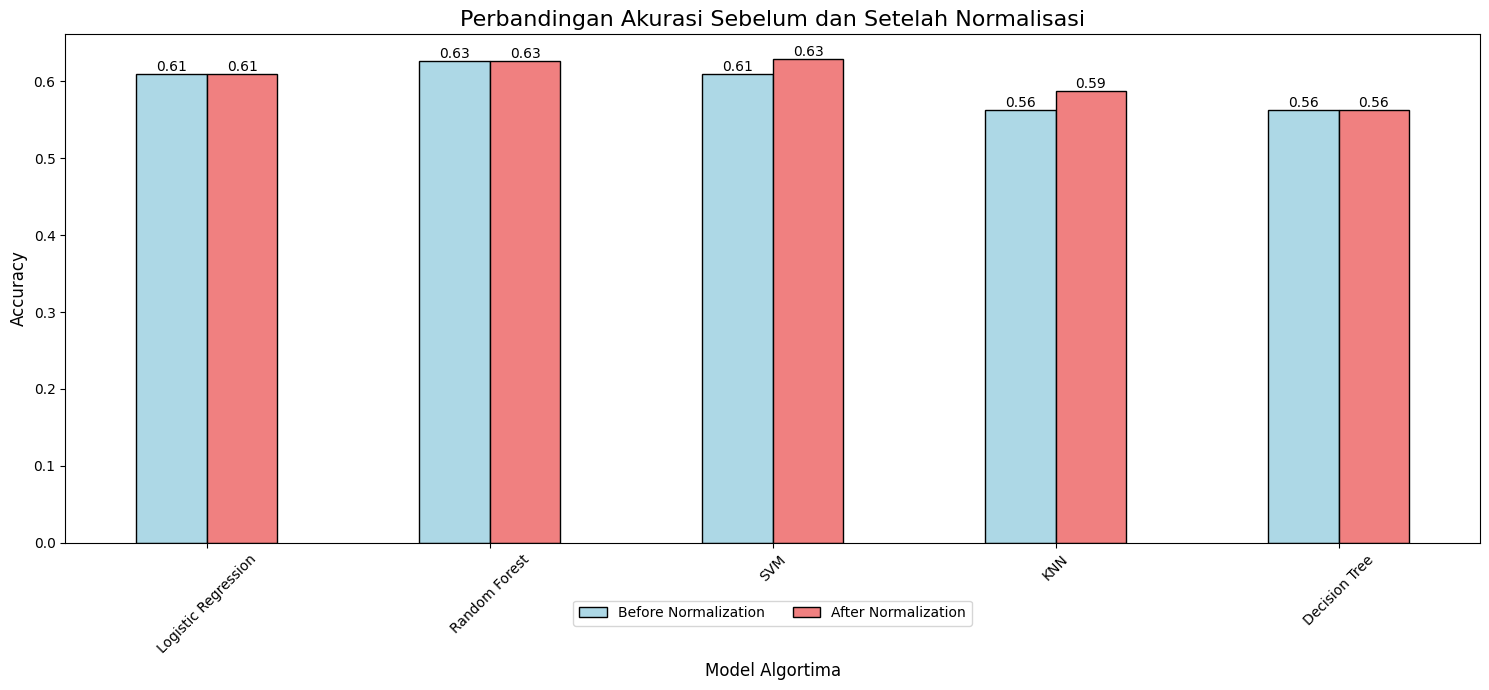

In [ ]:
# Membandingkan akurasi sebelum dan setelah normalisasi
comparison_df = pd.DataFrame({'Before Normalization': results_before_norm, 'After Normalization': results_after_norm})
plt.figure(figsize=(12, 7))
ax = comparison_df.plot(kind='bar', figsize=(15, 7), color=['lightblue', 'lightcoral'], edgecolor='black')

# Menambahkan judul dan label
plt.title('Perbandingan Akurasi Sebelum dan Setelah Normalisasi', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model Algortima', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Menambahkan label di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

# Menampilkan legenda di bawah
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=10)
plt.tight_layout()
plt.show()